In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#df is set to a dataset given by Dr. Nair, the professor of a course on Big Data I took as part of Columbia University's Summer Immersion Program

In [ ]:
df.shape

(999, 70)

In [ ]:
df.columns

Index(['id', 'member_id', 'CLI', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'pymnt_plan', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m'

,Total,Percent
inq_last_12m,999,100.000000
open_il_24m,999,100.000000
total_cu_tl,999,100.000000
annual_inc_joint,999,100.000000
dti_joint,999,100.000000
verification_status_joint,999,100.000000
tot_coll_amt,999,100.000000
tot_cur_bal,999,100.000000
open_acc_6m,999,100.000000
open_il_6m,999,100.000000


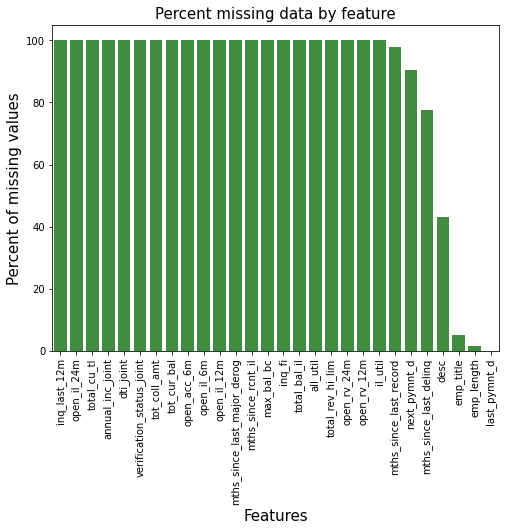

In [ ]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms
missingdata(df)

In [ ]:
df2 = df.drop(['inq_last_12m', 'total_cu_tl', 'inq_fi', 'total_rev_hi_lim', 'all_util', 'max_bal_bc', 'open_rv_24m', 'open_rv_12m', 'il_util', 'total_bal_il', 'mths_since_rcnt_il', 'open_il_24m', 'open_il_12m', 'open_il_6m', 'open_acc_6m', 'tot_cur_bal', 'tot_coll_amt', 'acc_now_delinq', 'verification_status_joint', 'dti_joint', 'annual_inc_joint', 'application_type', 'policy_code', 'mths_since_last_major_derog', 'collections_12_mths_ex_med', 'last_credit_pull_d', 'next_pymnt_d', 'last_pymnt_d', 'initial_list_status', 'pymnt_plan'], axis = 1)

In [ ]:
print(len(df2))

999


<AxesSubplot:xlabel='CLI', ylabel='Density'>

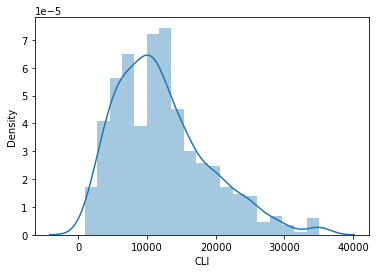

In [ ]:
sns.distplot(df2['CLI'], kde=True)

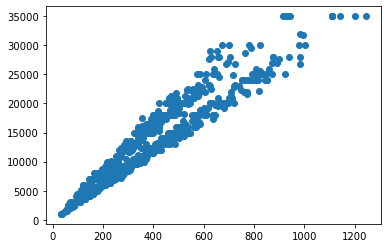

In [ ]:
x=df2['installment']
y=df2['CLI']
plt.scatter(x,y)

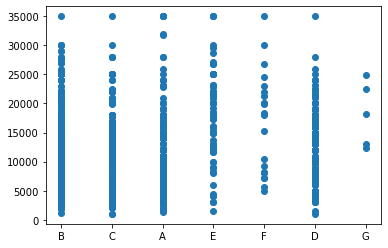

In [ ]:
x=df2['grade']
y=df2['CLI']
plt.scatter(x,y)

In [ ]:
df2['CLI'].mean(),df2['CLI'].median()

(12197.797797797797, 11000.0)

In [ ]:
df2.isna().sum()

id                           0
member_id                    0
CLI                          0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_title                   51
emp_length                  17
home_ownership               0
annual_inc                   0
verification_status          0
loan_status                  0
desc                       432
purpose                      0
title                        0
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
mths_since_last_delinq     774
mths_since_last_record     979
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                   0
total_acc                    0
out_prncp                    0
out_prncp_inv                0
total_py

In [ ]:
df2.shape

(999, 40)

In [ ]:
df2 = df2.drop(['collection_recovery_fee', 'recoveries', 'total_rec_late_fee', 'revol_util', 'pub_rec', 'mths_since_last_record', 'mths_since_last_delinq', 'inq_last_6mths', 'earliest_cr_line', 'delinq_2yrs', 'zip_code', 'title', 'desc', 'emp_title'], axis=1)

In [ ]:
df2.shape

(999, 26)

In [ ]:
df2['emp_length'].fillna(df2['emp_length'].mode()[0], inplace = True)

In [ ]:
print(df2.isnull().sum())

id                     0
member_id              0
CLI                    0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
addr_state             0
dti                    0
open_acc               0
revol_bal              0
total_acc              0
out_prncp              0
out_prncp_inv          0
total_pymnt            0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
last_pymnt_amnt        0
dtype: int64


In [ ]:
df2.columns

Index(['id', 'member_id', 'CLI', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti',
       'open_acc', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_amnt'],
      dtype='object')

In [ ]:
df2.dtypes

id                       int64
member_id                int64
CLI                      int64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
open_acc                 int64
revol_bal                int64
total_acc                int64
out_prncp              float64
out_prncp_inv          float64
total_pymnt            float64
total_pymnt_inv        float64
total_rec_prncp        float64
total_rec_int          float64
last_pymnt_amnt        float64
dtype: object

In [ ]:
df2 = df2.convert_dtypes()

In [ ]:
df2.dtypes

id                       Int64
member_id                Int64
CLI                      Int64
term                    string
int_rate               Float64
installment            Float64
grade                   string
sub_grade               string
emp_length              string
home_ownership          string
annual_inc             Float64
verification_status     string
loan_status             string
purpose                 string
addr_state              string
dti                    Float64
open_acc                 Int64
revol_bal                Int64
total_acc                Int64
out_prncp              Float64
out_prncp_inv          Float64
total_pymnt            Float64
total_pymnt_inv        Float64
total_rec_prncp        Float64
total_rec_int          Float64
last_pymnt_amnt        Float64
dtype: object

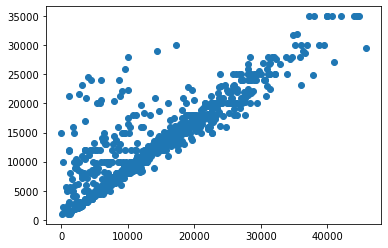

In [ ]:
x=df2['total_pymnt']
y=df2['CLI']
plt.scatter(x,y)

<AxesSubplot:title={'center':'CLI'}, ylabel='Frequency'>

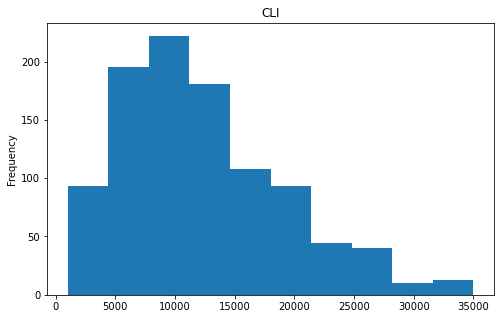

In [ ]:
df2.CLI.plot(kind='hist',title='CLI',figsize=(8,5))

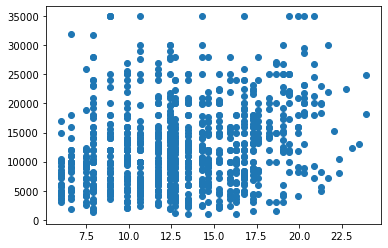

In [ ]:
x=df2['int_rate']
y=df2['CLI']
plt.scatter(x,y)

In [ ]:
df2.columns

Index(['id', 'member_id', 'CLI', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti',
       'open_acc', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_amnt'],
      dtype='object')

In [ ]:
df2.shape

(999, 26)

In [ ]:
df2 = df2.drop(['addr_state'], axis=1)

In [ ]:
df2.columns

Index(['id', 'member_id', 'CLI', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'open_acc',
       'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_amnt'],
      dtype='object')

In [ ]:
traindf = df2
traindf = pd.get_dummies(traindf, columns = ['home_ownership', 'verification_status', 'grade', 'sub_grade', 'loan_status', 'emp_length', 'purpose', 'term'])

In [ ]:
traindf.shape

(999, 95)

In [ ]:
traindf.dtypes

id                          Int64
member_id                   Int64
CLI                         Int64
int_rate                  Float64
installment               Float64
                           ...   
purpose_small_business      uint8
purpose_vacation            uint8
purpose_wedding             uint8
term_ 36 months             uint8
term_ 60 months             uint8
Length: 95, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
input1 = traindf.drop('CLI',axis=1)
output1 = traindf['CLI']
output1=output1.astype('int')

X_train,X_test,y_train,y_test = train_test_split(input1,output1,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((699, 94), (300, 94), (699,), (300,))

In [ ]:
#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('...The Accuracy Of The Model...')
print('Accuracy of linear regression model: {:.2f}'.format(lr.score(X_test, y_test)))
y_pred = lr.predict(X_test)
print('Mean squared error: %.2f'% mean_squared_error(y_test,y_pred))
print('Coefficient of determination: %.2f'% r2_score((y_test), (y_pred)))

...The Accuracy Of The Model...
Accuracy of linear regression model: 0.99
Mean squared error: 551892.28
Coefficient of determination: 0.99


In [ ]:
print(lr.intercept_)

3727.701094211754


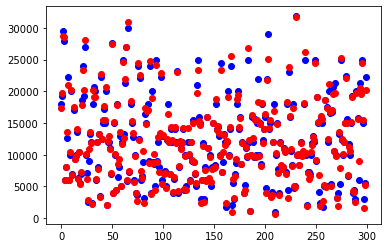

In [ ]:
plt.scatter(range(0, len(y_test)), y_test, color='blue')
plt.scatter(range(0, len(y_test)), y_pred, color='red')
plt.show()

In [ ]:
#Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.001)

In [ ]:
R.fit(X_train, y_train)

Ridge(alpha=0.001)

In [ ]:
print('...The Accuracy Of The Model...')
print('Accuracy of ridge regression model: {:.2f}'.format(R.score(X_test, y_test)))
y_pred = R.predict(X_test)
print('Mean squared error: %.2f'% mean_squared_error(y_test,y_pred))
print('Coefficient of determination: %.2f'% r2_score((y_test), (y_pred)))

...The Accuracy Of The Model...
Accuracy of ridge regression model: 0.99
Mean squared error: 551827.99
Coefficient of determination: 0.99


In [ ]:
#Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
print('...The Accuracy Of The Model...')
print('Accuracy of random forest regression model: {:.2f}'.format(regressor.score(X_test, y_test)))
y_pred = regressor.predict(X_test)
print('Mean squared error: %.2f'% mean_squared_error(y_test,y_pred))
print('Coefficient of determination: %.2f'% r2_score((y_test), (y_pred)))

...The Accuracy Of The Model...
Accuracy of random forest regression model: 0.99
Mean squared error: 384427.36
Coefficient of determination: 0.99


In [ ]:
#Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [ ]:
print('...The Accuracy Of The Model...')
print('Accuracy of lasso regression model: {:.2f}'.format(lasso.score(X_test, y_test)))
y_pred = lasso.predict(X_test)
print('Mean squared error: %.2f'% mean_squared_error(y_test,y_pred))
print('Coefficient of determination: %.2f'% r2_score((y_test), (y_pred)))

...The Accuracy Of The Model...
Accuracy of lasso regression model: 0.99
Mean squared error: 570356.15
Coefficient of determination: 0.99
